In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_excel("ev_final.xlsx")
data.head()

,uid,name,vendor_name,address,latitude,longitude,city,country,open,close,...,postal_code,zone,0,available,capacity,cost_per_unit,power_type,total,type,vehicle_type
0,STATIC12,GensolCharge Pvt. Ltd.,GensolCharge Pvt. Ltd.,"NDSE Grid, BRPL South Extension",28.568238,77.219666,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
1,STATIC14,REIL,REIL,Scada office kalka ji,28.541995,77.260583,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,3.3 kW,NaN,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']"
2,STATIC15,REIL,REIL,Ashram Chowk Mathura Road,28.571189,77.259806,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,2.0,BEVC DC 001,['4W']
3,STATIC16,REIL,REIL,Nizamuddin Railway station,28.588991,77.253240,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,4.0,BEVC DC 001,['4W']
4,STATIC17,BluSmart,BluSmart,"BSES Bhawan, Nehru Place, New Delhi 110048",28.549427,77.254636,Delhi,India,00:00:00,23:59:59,...,110001,central-delhi,NaN,NaN,15 kW,NaN,DC,1.0,BEVC DC 001,['4W']


In [4]:
data.shape

(2705, 25)

In [5]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,2705.0,27.021287,4.295497,0.0,28.535504,28.608759,28.674200,3.032503e+01
longitude,2705.0,77.281839,3.884501,0.0,77.095390,77.195630,77.281573,8.851696e+01
postal_code,2705.0,152660.247689,139469.046127,0.0,110032.000000,110059.000000,110081.000000,1.100091e+06
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
available,2467.0,0.997973,1.626897,0.0,1.000000,1.000000,1.000000,7.300000e+01
total,2497.0,1.221866,1.993488,1.0,1.000000,1.000000,1.000000,7.800000e+01


In [6]:
data.isnull().sum()

uid                   0
name                  0
vendor_name           0
address               0
latitude              0
longitude             0
city                  0
country               0
open                  0
close                 0
logo_url            467
staff                 0
payment_modes         0
contact_numbers       0
station_type          0
postal_code           0
zone                295
0                  2705
available           238
capacity            208
cost_per_unit       252
power_type          208
total               208
type                208
vehicle_type        208
dtype: int64

In [7]:
new_data=data.drop(columns=[0])

In [8]:
new_data.sample(5)

,uid,name,vendor_name,address,latitude,longitude,city,country,open,close,...,station_type,postal_code,zone,available,capacity,cost_per_unit,power_type,total,type,vehicle_type
966,REVBOLT_00023517,REVOS,REVOS,house no 524 near pillar no 513,28.682423,77.033047,Delhi,India,00:00:00,00:00:00,...,charging,110041,west-delhi,1.0,3.3 kW,₹0 per unit,AC,1.0,5A/15A Socket,"['2W', '3W']"
455,REVBOLT_003373,REVOS,REVOS,BSES RAJADHANI POWER LIMITED \noffice of divi...,28.556768,77.273228,New Delhi,India,00:00:00,00:00:00,...,charging,110025,south-delhi,1.0,3.3 kW,₹0 per unit,AC,1.0,5A/15A Socket,"['2W', '3W']"
1165,REVBOLT_00022122,REVOS,REVOS,Ashok parak metro station phool bagh,28.671407,77.155300,New Delhi,India,00:00:00,00:00:00,...,charging,110026,west-delhi,1.0,3.3 kW,₹0 per unit,AC,1.0,5A/15A Socket,"['2W', '3W']"
2645,968,EESL Subhash Nagar M,EESL,"Subhash Nagar Metro Station, Subhash Nagar, Na...",21.123300,79.039708,Nagpur,India,00:00,23:59,...,charging,440022,NaN,0.0,142.00 kW,₹33.00 per unit,DC,1.0,CCS (DC),['4W']
198,REVBOLT_001416,REVOS,REVOS,Delhi,28.568917,77.186861,New Delhi,India,00:00:00,00:00:00,...,charging,110066,south-west-delhi,1.0,3.3 kW,₹0 per unit,AC,1.0,5A/15A Socket,"['2W', '3W']"


In [9]:
new_data.isnull().sum()

uid                  0
name                 0
vendor_name          0
address              0
latitude             0
longitude            0
city                 0
country              0
open                 0
close                0
logo_url           467
staff                0
payment_modes        0
contact_numbers      0
station_type         0
postal_code          0
zone               295
available          238
capacity           208
cost_per_unit      252
power_type         208
total              208
type               208
vehicle_type       208
dtype: int64

In [10]:
new_data['zone'].value_counts()
new_data['zone'].fillna('Unknown', inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15256\3669738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['zone'].fillna('Unknown', inplace=True)


In [11]:
new_data['available'].value_counts()
new_data['available'].fillna(new_data['available'].mode()[0],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15256\738478719.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['available'].fillna(new_data['available'].mode()[0],inplace=True)


In [12]:

new_data.drop(columns=['uid','name','address','postal_code',],inplace=True)


In [13]:

new_data.drop(columns=['logo_url'],inplace=True)


In [14]:
new_data.drop(columns=['payment_modes','staff'],inplace=True)


In [15]:
india_data = new_data[(new_data['country'] == 'India') & (new_data['station_type'] == 'charging')]


In [16]:
india_data.drop(columns=['country','contact_numbers','station_type'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15256\806180618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data.drop(columns=['country','contact_numbers','station_type'],inplace=True)


In [17]:
india_data.shape

(2496, 14)

In [18]:
india_data.isnull().sum()

vendor_name       0
latitude          0
longitude         0
city              0
open              0
close             0
zone              0
available         0
capacity          1
cost_per_unit    45
power_type        1
total             1
type              1
vehicle_type      1
dtype: int64

In [19]:
india_data['capacity_num']=india_data['capacity'].str.extract(r'(\d+\.?\d*)')

C:\Users\user\AppData\Local\Temp\ipykernel_15256\2397655529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['capacity_num']=india_data['capacity'].str.extract(r'(\d+\.?\d*)')


In [20]:
india_data.drop(columns=['capacity'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15256\3114669674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data.drop(columns=['capacity'],inplace=True)


In [21]:
india_data['capacity_num']=pd.to_numeric(india_data['capacity_num'],errors='coerce',downcast='integer')

C:\Users\user\AppData\Local\Temp\ipykernel_15256\3344407643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['capacity_num']=pd.to_numeric(india_data['capacity_num'],errors='coerce',downcast='integer')


In [22]:
india_data['capacity_num'].describe()

count    2495.000000
mean       19.728337
std        42.020295
min         3.300000
25%         3.300000
50%         3.300000
75%         3.300000
max       142.000000
Name: capacity_num, dtype: float64

In [23]:
india_data['capacity_num'].value_counts().get(142, 0)


np.int64(258)

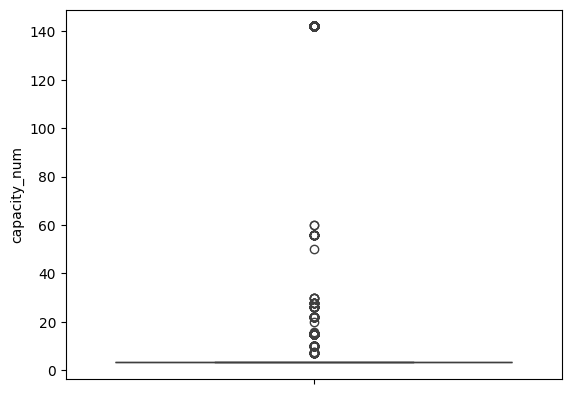

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=india_data['capacity_num'])
plt.show()

In [25]:
india_data

,vendor_name,latitude,longitude,city,open,close,zone,available,cost_per_unit,power_type,total,type,vehicle_type,capacity_num
0,GensolCharge Pvt. Ltd.,28.568238,77.219666,Delhi,00:00:00,23:59:59,central-delhi,1.0,NaN,DC,2.0,BEVC DC 001,['4W'],15.0
1,REIL,28.541995,77.260583,Delhi,00:00:00,23:59:59,central-delhi,1.0,NaN,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']",3.3
2,REIL,28.571189,77.259806,Delhi,00:00:00,23:59:59,central-delhi,1.0,NaN,DC,2.0,BEVC DC 001,['4W'],15.0
3,REIL,28.588991,77.253240,Delhi,00:00:00,23:59:59,central-delhi,1.0,NaN,DC,4.0,BEVC DC 001,['4W'],15.0
4,BluSmart,28.549427,77.254636,Delhi,00:00:00,23:59:59,central-delhi,1.0,NaN,DC,1.0,BEVC DC 001,['4W'],15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,EESL,13.078481,80.249480,Chennai,00:00,23:59,Unknown,0.0,₹12.93 per unit,DC,1.0,DC-001,['4W'],15.0
2701,EESL,13.078481,80.249480,Chennai,00:00,23:59,Unknown,0.0,₹20.14 per unit,DC,2.0,CCS (DC),['4W'],142.0
2702,EESL,13.078481,80.249480,Chennai,00:00,23:59,Unknown,0.0,₹20.14 per unit,DC,2.0,CHAdeMO (DC),['4W'],142.0
2703,Verdemobility,28.572632,77.169680,New Delhi,00:00:00,23:59:59,south-west-delhi,2.0,₹16 per unit,AC,2.0,TYPE - 2 (AC),['4W'],7.4


In [26]:
india_data['cpu_num']=india_data['cost_per_unit'].str.extract(r'(\d+\.?\d*)')

C:\Users\user\AppData\Local\Temp\ipykernel_15256\4235984922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['cpu_num']=india_data['cost_per_unit'].str.extract(r'(\d+\.?\d*)')


In [27]:
india_data.drop(columns=['cost_per_unit'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15256\3279290745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data.drop(columns=['cost_per_unit'],inplace=True)


In [28]:
india_data

,vendor_name,latitude,longitude,city,open,close,zone,available,power_type,total,type,vehicle_type,capacity_num,cpu_num
0,GensolCharge Pvt. Ltd.,28.568238,77.219666,Delhi,00:00:00,23:59:59,central-delhi,1.0,DC,2.0,BEVC DC 001,['4W'],15.0,NaN
1,REIL,28.541995,77.260583,Delhi,00:00:00,23:59:59,central-delhi,1.0,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']",3.3,NaN
2,REIL,28.571189,77.259806,Delhi,00:00:00,23:59:59,central-delhi,1.0,DC,2.0,BEVC DC 001,['4W'],15.0,NaN
3,REIL,28.588991,77.253240,Delhi,00:00:00,23:59:59,central-delhi,1.0,DC,4.0,BEVC DC 001,['4W'],15.0,NaN
4,BluSmart,28.549427,77.254636,Delhi,00:00:00,23:59:59,central-delhi,1.0,DC,1.0,BEVC DC 001,['4W'],15.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,EESL,13.078481,80.249480,Chennai,00:00,23:59,Unknown,0.0,DC,1.0,DC-001,['4W'],15.0,12.93
2701,EESL,13.078481,80.249480,Chennai,00:00,23:59,Unknown,0.0,DC,2.0,CCS (DC),['4W'],142.0,20.14
2702,EESL,13.078481,80.249480,Chennai,00:00,23:59,Unknown,0.0,DC,2.0,CHAdeMO (DC),['4W'],142.0,20.14
2703,Verdemobility,28.572632,77.169680,New Delhi,00:00:00,23:59:59,south-west-delhi,2.0,AC,2.0,TYPE - 2 (AC),['4W'],7.4,16


In [29]:
india_data['cpu_num']=pd.to_numeric(india_data['cpu_num'],errors='coerce',downcast='integer')

C:\Users\user\AppData\Local\Temp\ipykernel_15256\508067439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['cpu_num']=pd.to_numeric(india_data['cpu_num'],errors='coerce',downcast='integer')


In [30]:
india_data['cpu_num'].fillna(6, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15256\1913637506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  india_data['cpu_num'].fillna(6, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15256\1913637506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['cpu_num'].fillna(6, inplace=True)


In [31]:
india_data

,vendor_name,latitude,longitude,city,open,close,zone,available,power_type,total,type,vehicle_type,capacity_num,cpu_num
0,GensolCharge Pvt. Ltd.,28.568238,77.219666,Delhi,00:00:00,23:59:59,central-delhi,1.0,DC,2.0,BEVC DC 001,['4W'],15.0,6.00
1,REIL,28.541995,77.260583,Delhi,00:00:00,23:59:59,central-delhi,1.0,AC,3.0,BEVC AC 001,"['2W', '3W', '4W']",3.3,6.00
2,REIL,28.571189,77.259806,Delhi,00:00:00,23:59:59,central-delhi,1.0,DC,2.0,BEVC DC 001,['4W'],15.0,6.00
3,REIL,28.588991,77.253240,Delhi,00:00:00,23:59:59,central-delhi,1.0,DC,4.0,BEVC DC 001,['4W'],15.0,6.00
4,BluSmart,28.549427,77.254636,Delhi,00:00:00,23:59:59,central-delhi,1.0,DC,1.0,BEVC DC 001,['4W'],15.0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,EESL,13.078481,80.249480,Chennai,00:00,23:59,Unknown,0.0,DC,1.0,DC-001,['4W'],15.0,12.93
2701,EESL,13.078481,80.249480,Chennai,00:00,23:59,Unknown,0.0,DC,2.0,CCS (DC),['4W'],142.0,20.14
2702,EESL,13.078481,80.249480,Chennai,00:00,23:59,Unknown,0.0,DC,2.0,CHAdeMO (DC),['4W'],142.0,20.14
2703,Verdemobility,28.572632,77.169680,New Delhi,00:00:00,23:59:59,south-west-delhi,2.0,AC,2.0,TYPE - 2 (AC),['4W'],7.4,16.00


In [32]:
(india_data['cpu_num']==0).sum()

np.int64(1821)

In [33]:
india_data['cpu_num'] = india_data['cpu_num'].replace(0, 6)

C:\Users\user\AppData\Local\Temp\ipykernel_15256\1172541354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['cpu_num'] = india_data['cpu_num'].replace(0, 6)


In [34]:
india_data['cpu_num'].describe()

count    2496.000000
mean        8.541094
std         6.096724
min         1.600000
25%         6.000000
50%         6.000000
75%         6.000000
max        33.000000
Name: cpu_num, dtype: float64